# HW5 -- Artificial Artificial Intelligence

In [60]:
import pandas as pd
import numpy as np

neg = pd.read_csv('AMT_neg.csv')
pos = pd.read_csv('AMT_pos.csv')

## Initial EDA

In [61]:
neg[:3]

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,RejectionTime,RequesterFeedback,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.text,Answer.sentiment.label,Approve,Reject
0,3IQ9O0AYW6ZI3GD740H32KGG2SWITJ,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:08:17 PDT 2019,3,BatchId:3821423;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,44,0% (0/0),0% (0/0),0% (0/0),Missed Opportunity\nI had been very excited to...,Neutral,NaN,NaN
1,3IQ9O0AYW6ZI3GD740H32KGG2SWITJ,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:08:17 PDT 2019,3,BatchId:3821423;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,7,0% (0/0),0% (0/0),0% (0/0),Missed Opportunity\nI had been very excited to...,Negative,NaN,NaN
2,3IQ9O0AYW6ZI3GD740H32KGG2SWITJ,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:08:17 PDT 2019,3,BatchId:3821423;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,449,0% (0/0),0% (0/0),0% (0/0),Missed Opportunity\nI had been very excited to...,Positive,NaN,NaN


In [62]:
pos[:3]

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,RejectionTime,RequesterFeedback,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.text,Answer.sentiment.label,Approve,Reject
0,3VMV5CHJZ8F47P7CECH0H830NF4GTP,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:11:19 PDT 2019,3,BatchId:3821427;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,355,0% (0/0),0% (0/0),0% (0/0),funny like a clown\nGreetings again from the d...,Positive,NaN,NaN
1,3VMV5CHJZ8F47P7CECH0H830NF4GTP,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:11:19 PDT 2019,3,BatchId:3821427;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,487,0% (0/0),0% (0/0),0% (0/0),funny like a clown\nGreetings again from the d...,Neutral,NaN,NaN
2,3VMV5CHJZ8F47P7CECH0H830NF4GTP,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:11:19 PDT 2019,3,BatchId:3821427;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,1052,0% (0/0),0% (0/0),0% (0/0),funny like a clown\nGreetings again from the d...,Positive,NaN,NaN


In [63]:
neg.columns.tolist()

['HITId',
 'HITTypeId',
 'Title',
 'Description',
 'Keywords',
 'Reward',
 'CreationTime',
 'MaxAssignments',
 'RequesterAnnotation',
 'AssignmentDurationInSeconds',
 'AutoApprovalDelayInSeconds',
 'Expiration',
 'NumberOfSimilarHITs',
 'LifetimeInSeconds',
 'AssignmentId',
 'WorkerId',
 'AssignmentStatus',
 'AcceptTime',
 'SubmitTime',
 'AutoApprovalTime',
 'ApprovalTime',
 'RejectionTime',
 'RequesterFeedback',
 'WorkTimeInSeconds',
 'LifetimeApprovalRate',
 'Last30DaysApprovalRate',
 'Last7DaysApprovalRate',
 'Input.text',
 'Answer.sentiment.label',
 'Approve',
 'Reject']

### How many unique turkers worked on each dataframe?

In [64]:
def get_unique(df, column):
    unique = np.unique(df[column], return_counts=True)
    df = pd.DataFrame(zip(unique[0], unique[1]))
    return len(unique[0]), unique, df

num_neg, unique_neg, u_neg_df = get_unique(neg, 'WorkerId')    
num_pos, unique_pos, u_pos_df = get_unique(pos, 'WorkerId')

print(num_neg, 'Turkers worked on NEG batch')
print(num_pos, 'Turkers worked on POS batch')

53 Turkers worked on NEG batch
38 Turkers worked on POS batch


### How many HITS did each unique turker do?

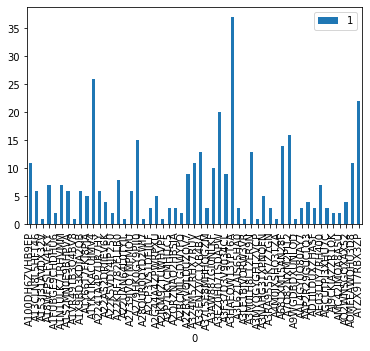

In [65]:
u_neg_df.plot(kind='bar',x=0,y=1)

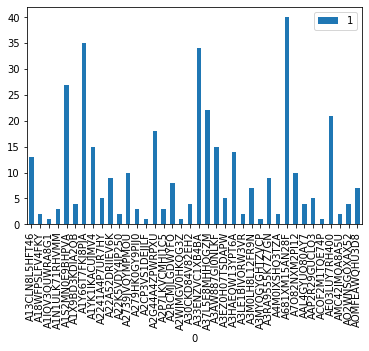

In [66]:
u_pos_df.plot(kind='bar',x=0,y=1)

### What's the `max` and `min` HIT for unique turkers

In [67]:
print('For {}, the min was: {} and the max was: {}'.format('neg', unique_neg[1].min(), unique_neg[1].max())) 
print('For {}, the min was: {} and the max was: {}'.format('pos', unique_pos[1].min(), unique_pos[1].max())) 

For neg, the min was: 1 and the max was: 37
For pos, the min was: 1 and the max was: 40


### Did a specitic Sentiment take longer for turkers to assess? 

Text(0.5, 1, 'Negative')

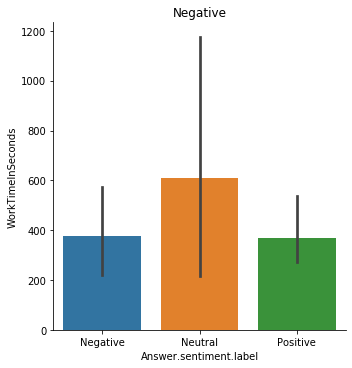

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Answer.sentiment.label", 
            y="WorkTimeInSeconds", 
            kind="bar", 
            order=['Negative', 'Neutral', 'Positive'], 
            data=neg);
plt.title('Negative')

Text(0.5, 1, 'Positive')

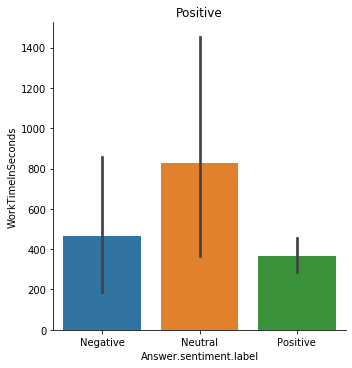

In [69]:
sns.catplot(x="Answer.sentiment.label", 
            y="WorkTimeInSeconds", 
            kind="bar", 
            order=['Negative', 'Neutral', 'Positive'], 
            data=pos)
plt.title('Positive')

### How many turkers had less than 10 second response time?

In [70]:
response_time = neg[neg['WorkTimeInSeconds'] < 10]
response_time_check = neg[neg['WorkTimeInSeconds'] > 10]

In [71]:
len(response_time)

48

In [72]:
len(response_time_check)

312

### Checking for potential bots

#### Did anyone have a consistent average low response time?

In [73]:
count = pos.groupby(['WorkerId'])['HITId'].count()
work_time = pos.groupby(['WorkerId'])['WorkTimeInSeconds'].mean()
new_df = pd.DataFrame([work_time, count]).T
new_df[:5]

,WorkTimeInSeconds,HITId
WorkerId,,
A13CLN8L5HFT46,7.230769,13.0
A18WFPSLFV4FKY,47.000000,2.0
A1IQV3QUWRA8G1,22.000000,1.0
A1N1ULK71RHVMM,10.000000,3.0
A1S2MN0E9BHPVA,173.444444,27.0


#### Did anyone have a consistent average high response time?

In [74]:
new_df['WorkTimeInMin'] = new_df['WorkTimeInSeconds']/60
new_df[:5]

,WorkTimeInSeconds,HITId,WorkTimeInMin
WorkerId,,,
A13CLN8L5HFT46,7.230769,13.0,0.120513
A18WFPSLFV4FKY,47.000000,2.0,0.783333
A1IQV3QUWRA8G1,22.000000,1.0,0.366667
A1N1ULK71RHVMM,10.000000,3.0,0.166667
A1S2MN0E9BHPVA,173.444444,27.0,2.890741


In [75]:
count = pos.groupby(['WorkerId', 'Answer.sentiment.label'])['Answer.sentiment.label'].count()
# count = pos.groupby(['WorkerId'])['Answer.sentiment.label'].count()
count

WorkerId        Answer.sentiment.label
A13CLN8L5HFT46  Neutral                    2
                Positive                  11
A18WFPSLFV4FKY  Positive                   2
A1IQV3QUWRA8G1  Positive                   1
A1N1ULK71RHVMM  Negative                   1
                                          ..
AMC42JMQA8A5U   Positive                   1
AO2WNSGOXAX52   Neutral                    3
                Positive                   1
AOMFEAWQHU3D8   Neutral                    1
                Positive                   6
Name: Answer.sentiment.label, Length: 74, dtype: int64

#### Did anyone answer ONLY pos/neg/neutral?

In [76]:
pnn = pd.DataFrame()
pnn['Neutral'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: (x=='Neutral').sum())
pnn['Positive'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: (x=='Positive').sum())
pnn['Negative'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: (x=='Negative').sum())
pnn['Total'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: x.count())
pnn[:5]

,Neutral,Positive,Negative,Total
WorkerId,,,,
A13CLN8L5HFT46,2,11,0,13
A18WFPSLFV4FKY,0,2,0,2
A1IQV3QUWRA8G1,0,1,0,1
A1N1ULK71RHVMM,0,2,1,3
A1S2MN0E9BHPVA,2,21,4,27


#### This is getting a little confusing, let's just look at our top performers

In [77]:
top = pnn.sort_values(by=['Total'], ascending=False)

In [78]:
top[:10]

,Neutral,Positive,Negative,Total
WorkerId,,,,
A681XM15AN28F,13,20,7,40
A1Y66T7FKJ8PJA,5,23,7,35
A33ENZVC1XB4BA,0,34,0,34
A1S2MN0E9BHPVA,2,21,4,27
A37L5E8MHHQGZM,6,13,3,22
AE03LUY7RH400,4,10,7,21
A2G44A4ZPWRPXU,4,12,2,18
A1YK1IKACUJMV4,0,15,0,15
A3AW887GI0NLKF,3,10,2,15


Interesting!! Looking from here, we have three workers who ONLY chose positive. 

Let's look at their response time to see if we can determine if they are a bot!!

In [79]:
top['Avg_WorkTimeInSeconds'] = pos.groupby('WorkerId')['WorkTimeInSeconds'].apply(lambda x: x.mean())
top['Avg_WorkTimeInMin'] = pos.groupby('WorkerId')['WorkTimeInSeconds'].apply(lambda x: x.mean()/60)
top['Min_WorkTimeInMin'] = pos.groupby('WorkerId')['WorkTimeInSeconds'].apply(lambda x: x.min()/60)
top['Max_WorkTimeInMin'] = pos.groupby('WorkerId')['WorkTimeInSeconds'].apply(lambda x: x.max()/60)

In [80]:
top[:10]

,Neutral,Positive,Negative,Total,Avg_WorkTimeInSeconds,Avg_WorkTimeInMin,Min_WorkTimeInMin,Max_WorkTimeInMin
WorkerId,,,,,,,,
A681XM15AN28F,13,20,7,40,13.575000,0.226250,0.100000,0.833333
A1Y66T7FKJ8PJA,5,23,7,35,695.857143,11.597619,0.216667,22.000000
A33ENZVC1XB4BA,0,34,0,34,366.647059,6.110784,0.616667,9.916667
A1S2MN0E9BHPVA,2,21,4,27,173.444444,2.890741,0.400000,4.983333
A37L5E8MHHQGZM,6,13,3,22,346.272727,5.771212,2.150000,8.283333
AE03LUY7RH400,4,10,7,21,102.238095,1.703968,0.100000,3.433333
A2G44A4ZPWRPXU,4,12,2,18,221.277778,3.687963,0.383333,7.383333
A1YK1IKACUJMV4,0,15,0,15,593.600000,9.893333,1.716667,11.000000
A3AW887GI0NLKF,3,10,2,15,269.400000,4.490000,1.616667,7.216667


Even more interesting! These two don't appear to be bots, based on our current metric which is time variability.

HOWEVER, worker `A681XM15AN28F` appears to only work for an average of 13 seconds per review which doesn't seem like enough time to read and judge a review...

## PART 2: Second submission to AMT

TOO MANY REVIEWERS!

Here is when we realized that doing a kappa score with over 30 individual reviewers would be tricky, so we rusubmitted to AMT and required the turkers to be 'Master' in the hopes that this additional barrier-to-entry would help reduce the amount of turkers working on the project

In [81]:
v2 = pd.read_csv('HW5_amt_v2.csv')
v2[:5]
len(v2)

293

This time, I didn't separate the df into pos and neg before submitting to AMT, so we have to reimport the labels.

In [82]:
labels = pd.read_csv('all_JK_extremes_labeled.csv')

In [83]:
len(labels)

98

Oops! That's right, we replicated each review * 3 so three separate people could look at each review

In [84]:
labels2 = labels.append([labels] * 2, ignore_index=True)

In [85]:
len(labels2)

294

In [86]:
labels2.sort_values(by='0')

,0,PoN
76,#LetRottenTomatoesRotSquad\nI am a simple guy...,P
174,#LetRottenTomatoesRotSquad\nI am a simple guy...,P
272,#LetRottenTomatoesRotSquad\nI am a simple guy...,P
116,A 'Triumph of the Will' for Nihilists\n'Joker...,N
18,A 'Triumph of the Will' for Nihilists\n'Joker...,N
...,...,...
227,lose of both time and money\nThis was one of ...,N
31,lose of both time and money\nThis was one of ...,N
207,poor plot\nPoor plot. i find no reason for jo...,N
11,poor plot\nPoor plot. i find no reason for jo...,N


Shoot! I realized I had to delete some emojis for the csv to be accepted by AMT, so the reviews themselves won't actually be matching... solution: Create two 'for-matching' columns made up of the first 5 words of each review

In [87]:
v2['for_matching'] = v2.apply(lambda x: x['Input.text'].split()[:5], axis=1)

In [88]:
labels2['for_matching'] = labels2.apply(lambda x: x['0'].split()[:5], axis=1)

Annnnnd why did I do that when I could just sort the df and apply the PoN

In [89]:
sorted_labels = labels2.sort_values(by='0')
sorted_labels[:6]

,0,PoN,for_matching
76,#LetRottenTomatoesRotSquad\nI am a simple guy...,P,"[#LetRottenTomatoesRotSquad, I, am, a, simple]"
174,#LetRottenTomatoesRotSquad\nI am a simple guy...,P,"[#LetRottenTomatoesRotSquad, I, am, a, simple]"
272,#LetRottenTomatoesRotSquad\nI am a simple guy...,P,"[#LetRottenTomatoesRotSquad, I, am, a, simple]"
116,A 'Triumph of the Will' for Nihilists\n'Joker...,N,"[A, 'Triumph, of, the, Will']"
18,A 'Triumph of the Will' for Nihilists\n'Joker...,N,"[A, 'Triumph, of, the, Will']"
214,A 'Triumph of the Will' for Nihilists\n'Joker...,N,"[A, 'Triumph, of, the, Will']"


In [90]:
sorted_v2 = v2.sort_values(by='Input.text')
sorted_v2[sorted_v2.columns[-5:]][:6]

,Input.text,Answer.sentiment.label,Approve,Reject,for_matching
229,#LetRottenTomatoesRotSquad\nI am a simple guy...,Positive,NaN,NaN,"[#LetRottenTomatoesRotSquad, I, am, a, simple]"
228,#LetRottenTomatoesRotSquad\nI am a simple guy...,Positive,NaN,NaN,"[#LetRottenTomatoesRotSquad, I, am, a, simple]"
227,#LetRottenTomatoesRotSquad\nI am a simple guy...,Positive,NaN,NaN,"[#LetRottenTomatoesRotSquad, I, am, a, simple]"
53,A 'Triumph of the Will' for Nihilists\n'Joker...,Neutral,NaN,NaN,"[A, 'Triumph, of, the, Will']"
55,A 'Triumph of the Will' for Nihilists\n'Joker...,Negative,NaN,NaN,"[A, 'Triumph, of, the, Will']"
54,A 'Triumph of the Will' for Nihilists\n'Joker...,Negative,NaN,NaN,"[A, 'Triumph, of, the, Will']"


In [91]:
all_df = sorted_v2.copy()
# all_df['PoN'] = sorted_labels['PoN'].tolist()
# THIS DIDN'T WORK BECAUSE I DIDN'T WAIT UNTIL ALL WERE DONE FROM AMT. RESEARCHER ERROR BUT OMG I HATE MYSELF

In [92]:
len(all_df)

293

In [93]:
293/3

97.66666666666667

Confirming that YEP. 293 isn't divisible by 3, meaning I didn't wait until the last turker finished. omg.

#### Reuploading now -- WITH BETTER CODE AND BETTER VARIABLE NAMES!

In [94]:
turker = pd.read_csv('HW5_amt_294.csv')
print(len(turker))
turker[turker.columns[-5:]][:5]

294


,Last7DaysApprovalRate,Input.text,Answer.sentiment.label,Approve,Reject
0,0% (0/0),Everyone praised an overrated movie.\nOverrat...,Negative,NaN,NaN
1,0% (0/0),Everyone praised an overrated movie.\nOverrat...,Negative,NaN,NaN
2,0% (0/0),Everyone praised an overrated movie.\nOverrat...,Negative,NaN,NaN
3,0% (0/0),What idiotic FIlm\nI can say that Phoenix is ...,Negative,NaN,NaN
4,0% (0/0),What idiotic FIlm\nI can say that Phoenix is ...,Negative,NaN,NaN


In [95]:
# Getting labels...
labels = pd.read_csv('all_JK_extremes_labeled.csv')
# X3
labels = labels.append([labels] * 2, ignore_index=True)
print(len(labels))
labels[:5]

294


,0,PoN
0,Everyone praised an overrated movie.\nOverrat...,N
1,What idiotic FIlm\nI can say that Phoenix is ...,N
2,Terrible\nThe only thing good about this movi...,N
3,Watch Taxi Driver instead\nThis is a poor att...,N
4,I learned one thing.\nIt borrows a lot of ele...,N


#### NOW, TO SORT!

In [96]:
sorted_labels = labels.sort_values(by=['0'])
sorted_turker = turker.sort_values(by=['Input.text'])

In [97]:
sorted_labels[:5]

,0,PoN
76,#LetRottenTomatoesRotSquad\nI am a simple guy...,P
174,#LetRottenTomatoesRotSquad\nI am a simple guy...,P
272,#LetRottenTomatoesRotSquad\nI am a simple guy...,P
116,A 'Triumph of the Will' for Nihilists\n'Joker...,N
18,A 'Triumph of the Will' for Nihilists\n'Joker...,N


In [98]:
sorted_turker['Input.text'][:5]

228     #LetRottenTomatoesRotSquad\nI am a simple guy...
229     #LetRottenTomatoesRotSquad\nI am a simple guy...
230     #LetRottenTomatoesRotSquad\nI am a simple guy...
56      A 'Triumph of the Will' for Nihilists\n'Joker...
55      A 'Triumph of the Will' for Nihilists\n'Joker...
Name: Input.text, dtype: object

OMG HOORAY HOORAY HOORAY!!



NOTE: FUN FACT!! I can type here and then hit the `esc` key to turn this cell into markdown!!

In [99]:
# YUCK THIS IS SO AGGRIVATING!! This line below doens't work because it still uses indexes.
# So the P and N didn't match up 
# sorted_turker['PoN'] = sorted_labels['PoN']
sorted_turker['PoN'] = sorted_labels['PoN'].tolist()
sorted_turker[sorted_turker.columns[-5:]][:5]

,Input.text,Answer.sentiment.label,Approve,Reject,PoN
228,#LetRottenTomatoesRotSquad\nI am a simple guy...,Positive,NaN,NaN,P
229,#LetRottenTomatoesRotSquad\nI am a simple guy...,Positive,NaN,NaN,P
230,#LetRottenTomatoesRotSquad\nI am a simple guy...,Positive,NaN,NaN,P
56,A 'Triumph of the Will' for Nihilists\n'Joker...,Negative,NaN,NaN,N
55,A 'Triumph of the Will' for Nihilists\n'Joker...,Negative,NaN,NaN,N


## PART 3: ANALYZE

First, let's clean ALL the things

In [100]:
all_df = sorted_turker[['Input.text', 'WorkerId', 'Answer.sentiment.label', 'PoN']]

In [101]:
all_df[:5]

,Input.text,WorkerId,Answer.sentiment.label,PoN
228,#LetRottenTomatoesRotSquad\nI am a simple guy...,A681XM15AN28F,Positive,P
229,#LetRottenTomatoesRotSquad\nI am a simple guy...,A2XFO0X6RCS98M,Positive,P
230,#LetRottenTomatoesRotSquad\nI am a simple guy...,AURYD2FH3FUOQ,Positive,P
56,A 'Triumph of the Will' for Nihilists\n'Joker...,A1T79J0XQXDDGC,Negative,N
55,A 'Triumph of the Will' for Nihilists\n'Joker...,A2XFO0X6RCS98M,Negative,N


In [102]:
all_df_all = all_df.copy()
all_df_all['APoN'] = all_df_all.apply(lambda x: x['Answer.sentiment.label'][0], axis=1)

In [103]:
all_df_all

,Input.text,WorkerId,Answer.sentiment.label,PoN,APoN
228,#LetRottenTomatoesRotSquad\nI am a simple guy...,A681XM15AN28F,Positive,P,P
229,#LetRottenTomatoesRotSquad\nI am a simple guy...,A2XFO0X6RCS98M,Positive,P,P
230,#LetRottenTomatoesRotSquad\nI am a simple guy...,AURYD2FH3FUOQ,Positive,P,P
56,A 'Triumph of the Will' for Nihilists\n'Joker...,A1T79J0XQXDDGC,Negative,N,N
55,A 'Triumph of the Will' for Nihilists\n'Joker...,A2XFO0X6RCS98M,Negative,N,N
...,...,...,...,...,...
265,Venice 76 review\nI have just watched the Joke...,ARLGZWN6W91WD,Positive,N,P
266,Venice 76 review\nI have just watched the Joke...,A38DC3BG1ZCVZ2,Positive,N,P
93,lose of both time and money\nThis was one of t...,A2XFO0X6RCS98M,Negative,N,N
94,lose of both time and money\nThis was one of t...,A3EZ0H07TSDAPW,Negative,N,N


In [104]:
all_df_all['agree'] = all_df_all.apply(lambda x: x['PoN'] == x['APoN'], axis=1)

In [105]:
all_df_all[-10:]

,Input.text,WorkerId,Answer.sentiment.label,PoN,APoN,agree
38,This is extremely bad...\nThis whole film make...,A3EZ0H07TSDAPW,Negative,N,N,True
216,Took my 65 year old mother to see it.\nI saw t...,A3EZ0H07TSDAPW,Positive,N,P,False
217,Took my 65 year old mother to see it.\nI saw t...,A2XFO0X6RCS98M,Positive,N,P,False
218,Took my 65 year old mother to see it.\nI saw t...,AKSJ3C5O3V9RB,Positive,N,P,False
264,Venice 76 review\nI have just watched the Joke...,A3EZ0H07TSDAPW,Positive,N,P,False
265,Venice 76 review\nI have just watched the Joke...,ARLGZWN6W91WD,Positive,N,P,False
266,Venice 76 review\nI have just watched the Joke...,A38DC3BG1ZCVZ2,Positive,N,P,False
93,lose of both time and money\nThis was one of t...,A2XFO0X6RCS98M,Negative,N,N,True
94,lose of both time and money\nThis was one of t...,A3EZ0H07TSDAPW,Negative,N,N,True
95,lose of both time and money\nThis was one of t...,ASB8T0H7L99RF,Negative,N,N,True


### Lets see how many agree!

In [106]:
agree_df = pd.DataFrame(all_df_all.groupby(['Input.text','PoN'])['agree'].mean())
agree_df = agree_df.reset_index()
agree_df[:5]

,Input.text,PoN,agree
0,#LetRottenTomatoesRotSquad\nI am a simple guy...,P,1.000000
1,A 'Triumph of the Will' for Nihilists\n'Joker...,N,1.000000
2,A Breath of Fresh Cinema\nBursting with emoti...,P,1.000000
3,A MASTERPIECE\nJoaquin Phoenix's performance ...,N,0.333333
4,A brilliant movie\nThis movie is slow but nev...,P,1.000000


OK so this actually gave us something we want...
BUT PLEASE TELL ME THE BETTER WAY!!

In [107]:
def return_agreement(num):
    if num == 0:
        return 'agree_wrong'
    if num == 1:
        return 'agree'
    if (num/1) !=0:
        return 'disparity'

agree_df['agree_factor'] = agree_df.apply(lambda x: return_agreement(x['agree']), axis=1)
agree_df

,Input.text,PoN,agree,agree_factor
0,#LetRottenTomatoesRotSquad\nI am a simple guy...,P,1.000000,agree
1,A 'Triumph of the Will' for Nihilists\n'Joker...,N,1.000000,agree
2,A Breath of Fresh Cinema\nBursting with emoti...,P,1.000000,agree
3,A MASTERPIECE\nJoaquin Phoenix's performance ...,N,0.333333,disparity
4,A brilliant movie\nThis movie is slow but nev...,P,1.000000,agree
...,...,...,...,...
93,The mirror of society\nActing 10/10\nActors 10...,N,0.000000,agree_wrong
94,This is extremely bad...\nThis whole film make...,N,1.000000,agree
95,Took my 65 year old mother to see it.\nI saw t...,N,0.000000,agree_wrong
96,Venice 76 review\nI have just watched the Joke...,N,0.000000,agree_wrong


In [120]:
# sns.catplot(x="Answer.sentiment.label", 
#             y="WorkTimeInSeconds", 
#             kind="bar", 
#             order=['Negative', 'Neutral', 'Positive'], 
#             data=gdp_forplot);
# plt.title('By Polarity')
gdf_forplot = gdf_forplot.reset_index()

NameError: name 'gdf_forplot' is not defined

In [121]:
gdf_forplot.groupby(['agree'])['agree'].count()

NameError: name 'gdf_forplot' is not defined

In [382]:
gdf_forplot.groupby(['agree','PoN'])['agree'].count()

agree     PoN
0.000000  N      14
          P      17
0.333333  N      10
          P       7
0.666667  N       9
          P       8
1.000000  N      15
          P      18
Name: agree, dtype: int64

In [122]:
df1 = agree_df.groupby(['agree_factor']).count()
df1.reset_index(inplace=True)
df1

,agree_factor,Input.text,PoN,agree
0,agree,33,33,33
1,agree_wrong,31,31,31
2,disparity,34,34,34


Text(0.5, 1.0, 'How many turkers agreed on sentiment?')

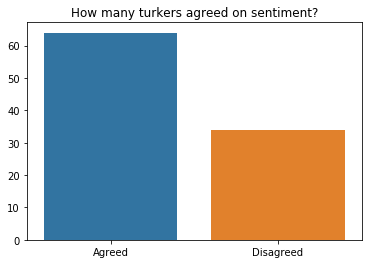

In [123]:
sns.barplot(x=['Agreed', 'Disagreed'],
           y= [64,34],
           data = df1);
plt.title('How many turkers agreed on sentiment?')

Text(0.5, 1.0, 'How many turkers agreed on sentiment, but were wrong?')

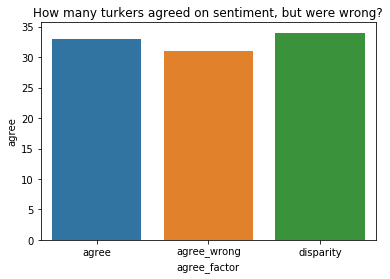

In [129]:
sns.barplot(x="agree_factor", y="agree", data=df1);
plt.title('How many turkers agreed on sentiment, but were wrong?')

In [130]:
df2 = agree_df.groupby(['agree_factor', 'PoN']).count()
df2.reset_index(inplace=True)

Text(0.5, 1.0, 'What was the pos/neg split for the turkers?')

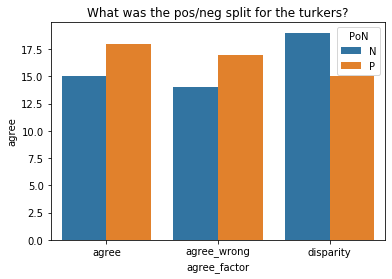

In [131]:
sns.barplot(x="agree_factor",
           y="agree",
           hue="PoN",
           data=df2);
plt.title("What was the pos/neg split for the turkers?")

## What was the kappa score for the turkers?

In [132]:
# Example code
from sklearn.metrics import cohen_kappa_score
y1 = [0,1,2,3,4,0,1,2,3,4,0,1,2,3,4]
y2 = [0,1,2,2,4,1,2,3,0,0,0,2,2,4,4]
cohen_kappa_score(y1,y2)

0.33333333333333337

In [135]:
pos.groupby(['HITId', 'WorkerId']).count()

HITTypeId  Title  Description  \
HITId                          WorkerId                                        
301KG0KX9CLONM8AF3FM1L6B224H2X A2739JVQYMPMOU          1      1            1   
                               A33ENZVC1XB4BA          1      1            1   
                               A3RA9555K7Z7GN          1      1            1   
30F94FBDNRK8G8Z1YQPMGXC372CBT3 A1S2MN0E9BHPVA          1      1            1   
                               A1Y66T7FKJ8PJA          1      1            1   
...                                                  ...    ...          ...   
3ZVPAMTJWN3RRAUKANC5HT2IZU7RGN A33ENZVC1XB4BA          1      1            1   
                               A681XM15AN28F           1      1            1   
3ZZAYRN1I6RSZ2OA2VU8MHC2E1VOTK A1IQV3QUWRA8G1          1      1            1   
                               A681XM15AN28F           1      1            1   
                               AE03LUY7RH400           1      1            1   

                                               Keywords  Reward  CreationTime  \
HITId                          WorkerId                                         
301KG0KX9CLONM8AF3FM1L6B224H2X A2739JVQYMPMOU         1       1             1   
                               A33ENZVC1XB4BA         1       1             1   
                               A3RA9555K7Z7GN         1       1             1   
30F94FBDNRK8G8Z1YQPMGXC372CBT3 A1S2MN0E9BHPVA         1       1             1   
                               A1Y66T7FKJ8PJA         1       1             1   
...                                                 ...     ...           ...   
3ZVPAMTJWN3RRAUKANC5HT2IZU7RGN A33ENZVC1XB4BA         1       1             1   
                               A681XM15AN28F          1       1             1   
3ZZAYRN1I6RSZ2OA2VU8MHC2E1VOTK A1IQV3QUWRA8G1         1       1             1   
                               A681XM15AN28F          1       1             1   
                               AE03LUY7RH400          1       1             1   

                                               MaxAssignments  \
HITId                          WorkerId                         
301KG0KX9CLONM8AF3FM1L6B224H2X A2739JVQYMPMOU               1   
                               A33ENZVC1XB4BA               1   
                               A3RA9555K7Z7GN               1   
30F94FBDNRK8G8Z1YQPMGXC372CBT3 A1S2MN0E9BHPVA               1   
                               A1Y66T7FKJ8PJA               1   
...                                                       ...   
3ZVPAMTJWN3RRAUKANC5HT2IZU7RGN A33ENZVC1XB4BA               1   
                               A681XM15AN28F                1   
3ZZAYRN1I6RSZ2OA2VU8MHC2E1VOTK A1IQV3QUWRA8G1               1   
                               A681XM15AN28F                1   
                               AE03LUY7RH400                1   

                                               RequesterAnnotation  \
HITId                          WorkerId                              
301KG0KX9CLONM8AF3FM1L6B224H2X A2739JVQYMPMOU                    1   
                               A33ENZVC1XB4BA                    1   
                               A3RA9555K7Z7GN                    1   
30F94FBDNRK8G8Z1YQPMGXC372CBT3 A1S2MN0E9BHPVA                    1   
                               A1Y66T7FKJ8PJA                    1   
...                                                            ...   
3ZVPAMTJWN3RRAUKANC5HT2IZU7RGN A33ENZVC1XB4BA                    1   
                               A681XM15AN28F                     1   
3ZZAYRN1I6RSZ2OA2VU8MHC2E1VOTK A1IQV3QUWRA8G1                    1   
                               A681XM15AN28F                     1   
                               AE03LUY7RH400                     1   

                                               AssignmentDurationInSeconds  \
HITId                          WorkerId                                      
301KG0KX9CLONM8AF3FM1L6B224H2X A2739JVQ

In [136]:
pnn = pd.DataFrame()
# pnn['Neutral'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: (x=='Neutral').sum())
# pnn['Positive'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: (x=='Positive').sum())
# pnn['Negative'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: (x=='Negative').sum())
# pnn['Total'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: x.count())
# pnn[:5]

,Input.text,WorkerId,Answer.sentiment.label,PoN
228,#LetRottenTomatoesRotSquad\nI am a simple guy...,A681XM15AN28F,Positive,P
229,#LetRottenTomatoesRotSquad\nI am a simple guy...,A2XFO0X6RCS98M,Positive,P
230,#LetRottenTomatoesRotSquad\nI am a simple guy...,AURYD2FH3FUOQ,Positive,P
56,A 'Triumph of the Will' for Nihilists\n'Joker...,A1T79J0XQXDDGC,Negative,N
55,A 'Triumph of the Will' for Nihilists\n'Joker...,A2XFO0X6RCS98M,Negative,N
...,...,...,...,...
265,Venice 76 review\nI have just watched the Joke...,ARLGZWN6W91WD,Positive,N
266,Venice 76 review\nI have just watched the Joke...,A38DC3BG1ZCVZ2,Positive,N
93,lose of both time and money\nThis was one of t...,A2XFO0X6RCS98M,Negative,N
94,lose of both time and money\nThis was one of t...,A3EZ0H07TSDAPW,Negative,N


In [138]:
top[:10]

,Neutral,Positive,Negative,Total,Avg_WorkTimeInSeconds,Avg_WorkTimeInMin,Min_WorkTimeInMin,Max_WorkTimeInMin
WorkerId,,,,,,,,
A681XM15AN28F,13,20,7,40,13.575000,0.226250,0.100000,0.833333
A1Y66T7FKJ8PJA,5,23,7,35,695.857143,11.597619,0.216667,22.000000
A33ENZVC1XB4BA,0,34,0,34,366.647059,6.110784,0.616667,9.916667
A1S2MN0E9BHPVA,2,21,4,27,173.444444,2.890741,0.400000,4.983333
A37L5E8MHHQGZM,6,13,3,22,346.272727,5.771212,2.150000,8.283333
AE03LUY7RH400,4,10,7,21,102.238095,1.703968,0.100000,3.433333
A2G44A4ZPWRPXU,4,12,2,18,221.277778,3.687963,0.383333,7.383333
A1YK1IKACUJMV4,0,15,0,15,593.600000,9.893333,1.716667,11.000000
A3AW887GI0NLKF,3,10,2,15,269.400000,4.490000,1.616667,7.216667


In [141]:
newdf = pd.DataFrame(turker.groupby(['HITId', 'WorkerId']))

In [142]:
newdf

,0,1
0,"(302OLP89DZ7MBHSY6QU0WCST11GACJ, A1T79J0XQXDDGC)",HITId ...
1,"(302OLP89DZ7MBHSY6QU0WCST11GACJ, A2XFO0X6RCS98M)",HITId ...
2,"(302OLP89DZ7MBHSY6QU0WCST11GACJ, A681XM15AN28F)",HITId ...
3,"(3087LXLJ6MGXDGEQ5QN8FC1JPSW0FT, A1L8RL58MYU4NC)",HITId ...
4,"(3087LXLJ6MGXDGEQ5QN8FC1JPSW0FT, A1T79J0XQXDDGC)",HITId ...
...,...,...
289,"(3ZLW647WALV9TE1B0IQKXR51J0B327, A38DC3BG1ZCVZ2)",HITId ...
290,"(3ZLW647WALV9TE1B0IQKXR51J0B327, ARLGZWN6W91WD)",HITId ...
291,"(3ZRKL6Z1E833SPUXPCCA737ELZESG6, A1L8RL58MYU4NC)",HITId ...
292,"(3ZRKL6Z1E833SPUXPCCA737ELZESG6, A38DC3BG1ZCVZ2)",HITId ...


In [147]:
turker.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.text',
       'Answer.sentiment.label', 'Approve', 'Reject'],
      dtype='object')

In [148]:
turker_clean = turker[['HITId', 'WorkerId', 'Answer.sentiment.label', 'Input.text']]

In [149]:
# turker_clean.groupby

,HITId,WorkerId,Answer.sentiment.label,Input.text
0,338GLSUI43BXEPY2ES6SPI72KKESF7,AH5A86OLRZWCS,Negative,Everyone praised an overrated movie.\nOverrat...
1,338GLSUI43BXEPY2ES6SPI72KKESF7,A2HGRSPR50ENHL,Negative,Everyone praised an overrated movie.\nOverrat...
2,338GLSUI43BXEPY2ES6SPI72KKESF7,AKSJ3C5O3V9RB,Negative,Everyone praised an overrated movie.\nOverrat...
3,37MQ8Z1JQEWA9HYZP3JANL1ES162YC,ARLGZWN6W91WD,Negative,What idiotic FIlm\nI can say that Phoenix is ...
4,37MQ8Z1JQEWA9HYZP3JANL1ES162YC,AKSJ3C5O3V9RB,Negative,What idiotic FIlm\nI can say that Phoenix is ...
...,...,...,...,...
289,3PUV2Q8SV441ZJ34C0P7BTUH4JDDBH,A3EZ0H07TSDAPW,Negative,Oscar for Phoenix\nI will stop watching movie...
290,3PUV2Q8SV441ZJ34C0P7BTUH4JDDBH,A38DC3BG1ZCVZ2,Positive,Oscar for Phoenix\nI will stop watching movie...
291,3FO95NVK5C0UHF3B5N6M67LLN8PSR2,A194R45ACMQEOR,Positive,Joker > Endgame\nNeed I say more? Everything ...
292,3FO95NVK5C0UHF3B5N6M67LLN8PSR2,A1L8RL58MYU4NC,Positive,Joker > Endgame\nNeed I say more? Everything ...


In [150]:
turker_clean.WorkerId.value_counts()

ARLGZWN6W91WD     46
A681XM15AN28F     37
A1T79J0XQXDDGC    34
A2XFO0X6RCS98M    33
A3EZ0H07TSDAPW    33
A1L8RL58MYU4NC    28
A38DC3BG1ZCVZ2    22
AKSJ3C5O3V9RB     21
ASB8T0H7L99RF     10
AE03LUY7RH400      6
A37JENVKZQ56U6     5
A194R45ACMQEOR     5
AH5A86OLRZWCS      4
A2HG1N3BVQO6I      4
AURYD2FH3FUOQ      2
AMC42JMQA8A5U      2
ATHS9GUME1XCA      1
A2HGRSPR50ENHL     1
Name: WorkerId, dtype: int64

In [161]:
turker1 = turker_clean[turker_clean['WorkerId'] == 'ARLGZWN6W91WD']
turker2 = turker_clean[turker_clean['WorkerId'] == 'A681XM15AN28F']
turker3 = turker_clean[turker_clean['WorkerId'] == 'A1T79J0XQXDDGC']
turker4 = turker_clean[turker_clean['WorkerId'] == 'A2XFO0X6RCS98M']
turker5 = turker_clean[turker_clean['WorkerId'] == 'A3EZ0H07TSDAPW']

In [162]:
turker1.reset_index(drop=True, inplace=True)
turker2.reset_index(drop=True, inplace=True)
turker3.reset_index(drop=True, inplace=True)
turker4.reset_index(drop=True, inplace=True)
turker5.reset_index(drop=True, inplace=True)

In [165]:
merged_df = pd.concat([turker1, turker2, turker3, turker4, turker5], axis=0, sort=False)

In [168]:
merged_df.reset_index(drop=True, inplace=True)

In [196]:
merged_df.sort_values(by='Input.text')

,HITId,WorkerId,Answer.sentiment.label,Input.text
79,3AQN9REUTFGXCRWFMS3RJ4SIPSUYDG,A681XM15AN28F,Positive,#LetRottenTomatoesRotSquad\nI am a simple guy...
142,3AQN9REUTFGXCRWFMS3RJ4SIPSUYDG,A2XFO0X6RCS98M,Positive,#LetRottenTomatoesRotSquad\nI am a simple guy...
122,3IVKZBIBJ09HSLP89IUSS3JF0ZRSH5,A2XFO0X6RCS98M,Negative,A 'Triumph of the Will' for Nihilists\n'Joker...
55,3IVKZBIBJ09HSLP89IUSS3JF0ZRSH5,A681XM15AN28F,Neutral,A 'Triumph of the Will' for Nihilists\n'Joker...
87,3IVKZBIBJ09HSLP89IUSS3JF0ZRSH5,A1T79J0XQXDDGC,Negative,A 'Triumph of the Will' for Nihilists\n'Joker...
...,...,...,...,...
175,3J9UN9O9J3SDII0MOGETUATBIZD0JW,A3EZ0H07TSDAPW,Positive,Took my 65 year old mother to see it.\nI saw t...
43,31ODACBENUFU5EOBS8HM1HBGRMNSQ1,ARLGZWN6W91WD,Positive,Venice 76 review\nI have just watched the Joke...
180,31ODACBENUFU5EOBS8HM1HBGRMNSQ1,A3EZ0H07TSDAPW,Positive,Venice 76 review\nI have just watched the Joke...
162,3M93N4X8HKNDJRKYXIXD4GZUDRVSJA,A3EZ0H07TSDAPW,Negative,lose of both time and money\nThis was one of t...


In [171]:
merged_df2 = pd.concat([turker1, turker2], axis=0, sort=False)

In [195]:
merged_df2.sort_values(by='Input.text')

,HITId,WorkerId,Answer.sentiment.label,Input.text
33,3AQN9REUTFGXCRWFMS3RJ4SIPSUYDG,A681XM15AN28F,Positive,#LetRottenTomatoesRotSquad\nI am a simple guy...
9,3IVKZBIBJ09HSLP89IUSS3JF0ZRSH5,A681XM15AN28F,Neutral,A 'Triumph of the Will' for Nihilists\n'Joker...
36,39O0SQZVJN78YHJJHK8BBGPP0UD7RV,ARLGZWN6W91WD,Positive,A Breath of Fresh Cinema\nBursting with emoti...
30,334ZEL5JX6FRK2BVDVPICCGGCL5SOT,A681XM15AN28F,Positive,A brilliant movie\nThis movie is slow but nev...
31,3DWGDA5POF4MG2LY1OWCB3NFIEPV1E,ARLGZWN6W91WD,Positive,A clean masterpiece!\nWhat I loved the most a...
...,...,...,...,...
7,3D17ECOUOEV24TJFHEQ6S8VWRUX31Q,ARLGZWN6W91WD,Negative,Overhyped and not everyone joker performance i...
6,3G3AJKPCXLSKCVDMTH2YG0YCCF1Y43,A681XM15AN28F,Neutral,Ridiculous well acted Trash\nSaw the movie Jok...
17,3JAOYN9IHL2YEWXU4I4PG1ATPEB33I,A681XM15AN28F,Neutral,The king has no clothes\nRead the reviews- the...
38,3J5XXLQDHMBIQ5ZDOSAVZW2CGY3V36,ARLGZWN6W91WD,Positive,The mirror of society\nActing 10/10\nActors 10...


In [191]:
# merged_df2['Input.text'].value_counts()
# df = pd.DataFrame(merged_df2.groupby('HITId'))
# df.set_index([turker1, turker2]).unstack(level=0)

In [203]:
# grouped = turker_clean.groupby(['HITId','WorkerId'])
# grouped.set_index(['HITId', 'WorkerId']).mean().unstack(level=0)
df = merged_df.drop('Input.text', axis=1)
df

,HITId,WorkerId,Answer.sentiment.label
0,37MQ8Z1JQEWA9HYZP3JANL1ES162YC,ARLGZWN6W91WD,Negative
1,3I7SHAD35MWH116RCCCUPHVFU7E7M7,ARLGZWN6W91WD,Negative
2,3XUSYT70IT10FW0UEKSIRCYYDFG0DI,ARLGZWN6W91WD,Negative
3,3SD15I2WD2UXBFKCNK2NN4MDZ5D63R,ARLGZWN6W91WD,Negative
4,3P7QK0GJ3TLAE784LPLT1SAGYVA2Z3,ARLGZWN6W91WD,Negative
...,...,...,...
178,39KV3A5D187KZWJWW98G1QULMWW7SJ,A3EZ0H07TSDAPW,Neutral
179,35F6NGNVM8JLEWWBL9D6BVQ7OFA7T8,A3EZ0H07TSDAPW,Positive
180,31ODACBENUFU5EOBS8HM1HBGRMNSQ1,A3EZ0H07TSDAPW,Positive
181,3PN6H8C9R4QWG9YC6MPBGIABM1SDAM,A3EZ0H07TSDAPW,Neutral


In [213]:
df = pd.DataFrame({'Turker': merged_df['WorkerId'].tolist(),
                   'REVIEW': merged_df['Answer.sentiment.label'].tolist(),
                   'SENTIMENT': merged_df['HITId'].tolist() })

grouped = df.groupby('Turker')
values = grouped['SENTIMENT'].agg('sum')
id_df = grouped['REVIEW'].apply(lambda x: pd.Series(x.values)).unstack()
id_df = id_df.rename(columns={i: 'REVIEW{}'.format(i + 1) for i in range(id_df.shape[1])})
result = pd.concat([id_df, values], axis=1)
result_df = pd.DataFrame(result)
print(result_df)

                 REVIEW1   REVIEW2   REVIEW3   REVIEW4   REVIEW5   REVIEW6  \
Turker                                                                       
A1T79J0XQXDDGC  Positive  Negative  Positive  Positive  Negative  Negative   
A2XFO0X6RCS98M  Negative  Negative  Negative  Negative  Positive  Negative   
A3EZ0H07TSDAPW  Positive   Neutral  Positive  Negative  Negative  Positive   
A681XM15AN28F   Negative  Positive  Positive  Positive  Positive  Negative   
ARLGZWN6W91WD   Negative  Negative  Negative  Negative  Negative  Negative   

                 REVIEW7   REVIEW8   REVIEW9  REVIEW10  ...  REVIEW38  \
Turker                                                  ...             
A1T79J0XQXDDGC  Negative  Positive  Negative  Negative  ...       NaN   
A2XFO0X6RCS98M  Negative  Negative  Negative  Negative  ...       NaN   
A3EZ0H07TSDAPW  Negative  Positive  Positive  Negative  ...       NaN   
A681XM15AN28F    Neutral   Neutral   Neutral   Neutral  ...       NaN   
ARLGZWN6W91WD  

In [216]:
df = pd.DataFrame({'Turker': merged_df['WorkerId'].tolist(),
                   'SENTIMENT': merged_df['Answer.sentiment.label'].tolist(),
                   'REVIEW': merged_df['HITId'].tolist() })

grouped = df.groupby('Turker')
values = grouped['REVIEW'].agg('sum')
id_df = grouped['SENTIMENT'].apply(lambda x: pd.Series(x.values)).unstack()
id_df = id_df.rename(columns={i: 'SENTIMENT{}'.format(i + 1) for i in range(id_df.shape[1])})
result = pd.concat([id_df, values], axis=1)
result_df = pd.DataFrame(result)
print(result_df.T)

Turker                                          A1T79J0XQXDDGC  \
SENTIMENT1                                            Positive   
SENTIMENT2                                            Negative   
SENTIMENT3                                            Positive   
SENTIMENT4                                            Positive   
SENTIMENT5                                            Negative   
SENTIMENT6                                            Negative   
SENTIMENT7                                            Negative   
SENTIMENT8                                            Positive   
SENTIMENT9                                            Negative   
SENTIMENT10                                           Negative   
SENTIMENT11                                           Negative   
SENTIMENT12                                           Negative   
SENTIMENT13                                           Negative   
SENTIMENT14                                           Negative   
SENTIMENT1

In [225]:
t1 = result_df.T['A3EZ0H07TSDAPW'].tolist()
len(t1)

47

In [245]:
t2 = result_df.T['A2XFO0X6RCS98M'].tolist()
len(t2)
t3 = result_df.T['A681XM15AN28F'].tolist()
len(t3)
t4 = result_df.T['ARLGZWN6W91WD'].tolist()

In [246]:
t1[:-1]

['Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [247]:
t2[:-1]

['Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [248]:
t3

['Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Negative',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '3SD15I2WD2UXBFKCNK2NN4MDZ5D63R302OLP89DZ7MBHSY6QU0WCST11GACJ3P7QK0GJ3TLAE784LPLT1SAGYVA2Z33ZRKL6Z1E833SPUXPCCA737ELZESG63PN6H8C9R4QWG9YC6MPBGIABM1SADJ3WGCNLZJKF80MLLCA3WI5HH8I7MD1Y3G3AJKPCXLSKCVDMTH2YG0YCCF1Y433D17ECOUOEV24TJFHEQ6S8VWRUX31Q3XWUWJ18TLQ2CKNWYMWRQJQTF4EUUO3IVKZBIBJ09HSLP89IUSS3JF0ZRSH53H5TOKO3D9JITB3GNY76X9EJD5964C3MVY4USGB6NHOG0SF0CDSFKU0C6SIY32PT7WK7DMFWWOZRX7A1TAW5GR0D3Q3SMIWMMK615F4OC1TMBS87BQ0KPUWN3X4Q1O9UBHM514R3PSR7HLKKP7T7OM3J94SKDEKIPZA3MVBQYU87UPUNR

In [251]:
from sklearn.metrics import cohen_kappa_score
y1 = t1[:-1]
y2 = t2[:-1]
cohen_kappa_score(y1,y2)

0.43974358974358974

In [252]:
from sklearn.metrics import cohen_kappa_score
y3 = t3[:-1]
y4 = t4[:-1]
cohen_kappa_score(y3,y4)

-0.07585335018963324

In [272]:
# turker_clean
turker_clean_test = turker_clean.copy()
turker_clean_test.reset_index(inplace=True)

id_dict = {}
id_num = 1
def return_new_id(old_id,):
    if old_id in id_dict.keys():
        return id_dict[old_id]
    else:
        id_num = id_num + 1
        id_dict.update({ old_id: id_num })
        return num

# turker_clean_test['ReviewID'] = turker_clean_test.apply(lambda x: return_new_id(x['HITId']), axis=1)
# turker_clean_test
turker_clean_test

# import Counter 
# Counter(K)

new_ids = pd.factorize(turker_clean_test['HITId'].tolist())
new_ids[0]
turker_clean_test['ReviewID'] = new_ids[0]

In [273]:
turker_clean_test

,index,HITId,WorkerId,Answer.sentiment.label,Input.text,ReviewID
0,0,338GLSUI43BXEPY2ES6SPI72KKESF7,AH5A86OLRZWCS,Negative,Everyone praised an overrated movie.\nOverrat...,0
1,1,338GLSUI43BXEPY2ES6SPI72KKESF7,A2HGRSPR50ENHL,Negative,Everyone praised an overrated movie.\nOverrat...,0
2,2,338GLSUI43BXEPY2ES6SPI72KKESF7,AKSJ3C5O3V9RB,Negative,Everyone praised an overrated movie.\nOverrat...,0
3,3,37MQ8Z1JQEWA9HYZP3JANL1ES162YC,ARLGZWN6W91WD,Negative,What idiotic FIlm\nI can say that Phoenix is ...,1
4,4,37MQ8Z1JQEWA9HYZP3JANL1ES162YC,AKSJ3C5O3V9RB,Negative,What idiotic FIlm\nI can say that Phoenix is ...,1
...,...,...,...,...,...,...
289,289,3PUV2Q8SV441ZJ34C0P7BTUH4JDDBH,A3EZ0H07TSDAPW,Negative,Oscar for Phoenix\nI will stop watching movie...,96
290,290,3PUV2Q8SV441ZJ34C0P7BTUH4JDDBH,A38DC3BG1ZCVZ2,Positive,Oscar for Phoenix\nI will stop watching movie...,96
291,291,3FO95NVK5C0UHF3B5N6M67LLN8PSR2,A194R45ACMQEOR,Positive,Joker > Endgame\nNeed I say more? Everything ...,97
292,292,3FO95NVK5C0UHF3B5N6M67LLN8PSR2,A1L8RL58MYU4NC,Positive,Joker > Endgame\nNeed I say more? Everything ...,97


In [274]:
new_turker_ids = pd.factorize(turker_clean_test['WorkerId'].tolist())

In [276]:
t_ids = ['T_' + str(id) for id in new_turker_ids[0]]

In [277]:
t_ids

['T_0',
 'T_1',
 'T_2',
 'T_3',
 'T_2',
 'T_4',
 'T_5',
 'T_6',
 'T_7',
 'T_8',
 'T_5',
 'T_3',
 'T_5',
 'T_3',
 'T_8',
 'T_5',
 'T_3',
 'T_9',
 'T_10',
 'T_9',
 'T_8',
 'T_3',
 'T_9',
 'T_4',
 'T_7',
 'T_10',
 'T_2',
 'T_9',
 'T_7',
 'T_4',
 'T_9',
 'T_3',
 'T_2',
 'T_11',
 'T_0',
 'T_9',
 'T_4',
 'T_8',
 'T_5',
 'T_5',
 'T_9',
 'T_12',
 'T_5',
 'T_3',
 'T_10',
 'T_8',
 'T_10',
 'T_13',
 'T_9',
 'T_3',
 'T_2',
 'T_3',
 'T_9',
 'T_4',
 'T_9',
 'T_8',
 'T_10',
 'T_3',
 'T_13',
 'T_4',
 'T_10',
 'T_5',
 'T_8',
 'T_2',
 'T_9',
 'T_10',
 'T_3',
 'T_5',
 'T_10',
 'T_3',
 'T_9',
 'T_10',
 'T_5',
 'T_8',
 'T_7',
 'T_9',
 'T_12',
 'T_8',
 'T_10',
 'T_5',
 'T_3',
 'T_4',
 'T_8',
 'T_2',
 'T_3',
 'T_14',
 'T_5',
 'T_15',
 'T_12',
 'T_4',
 'T_4',
 'T_3',
 'T_9',
 'T_8',
 'T_5',
 'T_6',
 'T_2',
 'T_8',
 'T_9',
 'T_10',
 'T_4',
 'T_9',
 'T_8',
 'T_3',
 'T_7',
 'T_10',
 'T_3',
 'T_9',
 'T_2',
 'T_5',
 'T_3',
 'T_8',
 'T_9',
 'T_2',
 'T_9',
 'T_8',
 'T_3',
 'T_7',
 'T_5',
 'T_16',
 'T_4',
 'T_3',
 'T

In [278]:
turker_clean_test['T_ID'] = t_ids
turker_clean_test

,index,HITId,WorkerId,Answer.sentiment.label,Input.text,ReviewID,T_ID
0,0,338GLSUI43BXEPY2ES6SPI72KKESF7,AH5A86OLRZWCS,Negative,Everyone praised an overrated movie.\nOverrat...,0,T_0
1,1,338GLSUI43BXEPY2ES6SPI72KKESF7,A2HGRSPR50ENHL,Negative,Everyone praised an overrated movie.\nOverrat...,0,T_1
2,2,338GLSUI43BXEPY2ES6SPI72KKESF7,AKSJ3C5O3V9RB,Negative,Everyone praised an overrated movie.\nOverrat...,0,T_2
3,3,37MQ8Z1JQEWA9HYZP3JANL1ES162YC,ARLGZWN6W91WD,Negative,What idiotic FIlm\nI can say that Phoenix is ...,1,T_3
4,4,37MQ8Z1JQEWA9HYZP3JANL1ES162YC,AKSJ3C5O3V9RB,Negative,What idiotic FIlm\nI can say that Phoenix is ...,1,T_2
...,...,...,...,...,...,...,...
289,289,3PUV2Q8SV441ZJ34C0P7BTUH4JDDBH,A3EZ0H07TSDAPW,Negative,Oscar for Phoenix\nI will stop watching movie...,96,T_5
290,290,3PUV2Q8SV441ZJ34C0P7BTUH4JDDBH,A38DC3BG1ZCVZ2,Positive,Oscar for Phoenix\nI will stop watching movie...,96,T_7
291,291,3FO95NVK5C0UHF3B5N6M67LLN8PSR2,A194R45ACMQEOR,Positive,Joker > Endgame\nNeed I say more? Everything ...,97,T_13
292,292,3FO95NVK5C0UHF3B5N6M67LLN8PSR2,A1L8RL58MYU4NC,Positive,Joker > Endgame\nNeed I say more? Everything ...,97,T_4


In [281]:
turker_clean_test['sentiment'] = turker_clean_test.apply(lambda x: x['Answer.sentiment.label'][0], axis=1)

In [282]:
turker_clean_test

,index,HITId,WorkerId,Answer.sentiment.label,Input.text,ReviewID,T_ID,sentiment
0,0,338GLSUI43BXEPY2ES6SPI72KKESF7,AH5A86OLRZWCS,Negative,Everyone praised an overrated movie.\nOverrat...,0,T_0,N
1,1,338GLSUI43BXEPY2ES6SPI72KKESF7,A2HGRSPR50ENHL,Negative,Everyone praised an overrated movie.\nOverrat...,0,T_1,N
2,2,338GLSUI43BXEPY2ES6SPI72KKESF7,AKSJ3C5O3V9RB,Negative,Everyone praised an overrated movie.\nOverrat...,0,T_2,N
3,3,37MQ8Z1JQEWA9HYZP3JANL1ES162YC,ARLGZWN6W91WD,Negative,What idiotic FIlm\nI can say that Phoenix is ...,1,T_3,N
4,4,37MQ8Z1JQEWA9HYZP3JANL1ES162YC,AKSJ3C5O3V9RB,Negative,What idiotic FIlm\nI can say that Phoenix is ...,1,T_2,N
...,...,...,...,...,...,...,...,...
289,289,3PUV2Q8SV441ZJ34C0P7BTUH4JDDBH,A3EZ0H07TSDAPW,Negative,Oscar for Phoenix\nI will stop watching movie...,96,T_5,N
290,290,3PUV2Q8SV441ZJ34C0P7BTUH4JDDBH,A38DC3BG1ZCVZ2,Positive,Oscar for Phoenix\nI will stop watching movie...,96,T_7,P
291,291,3FO95NVK5C0UHF3B5N6M67LLN8PSR2,A194R45ACMQEOR,Positive,Joker > Endgame\nNeed I say more? Everything ...,97,T_13,P
292,292,3FO95NVK5C0UHF3B5N6M67LLN8PSR2,A1L8RL58MYU4NC,Positive,Joker > Endgame\nNeed I say more? Everything ...,97,T_4,P


In [283]:
even_cleaner_df = turker_clean_test[['ReviewID', 'T_ID', 'sentiment']]

In [301]:
df

,0,1
0,0,"0 N 1 N 2 N Name: sentiment, dtype: o..."
1,1,"3 N 4 N 5 N Name: sentiment, dtype: o..."
2,2,"6 P 7 N 8 N Name: sentiment, dtype: o..."
3,3,"9 N 10 N 11 N Name: sentiment, dtype..."
4,4,"12 P 13 N 14 N Name: sentiment, dtype..."
...,...,...
93,93,"279 P 280 P 281 P Name: sentiment, dt..."
94,94,"282 P 283 N 284 P Name: sentiment, dt..."
95,95,"285 P 286 P 287 P Name: sentiment, dt..."
96,96,"288 N 289 N 290 P Name: sentiment, dt..."


In [305]:
df = pd.DataFrame({'Turker': even_cleaner_df['T_ID'].tolist(),
                   'SENTIMENT': even_cleaner_df['sentiment'].tolist(),
                   'REVIEW': even_cleaner_df['ReviewID'].tolist() })

grouped = df.groupby('Turker')
values = grouped['REVIEW'].agg('sum')
id_df = grouped['SENTIMENT'].apply(lambda x: pd.Series(x.values)).unstack()
id_df = id_df.rename(columns={i: 'REVIEW{}'.format(i + 1) for i in range(id_df.shape[1])})
result = pd.concat([id_df, values], axis=1)
result_df = pd.DataFrame(result)
print(result_df.T)

Turker    T_0  T_1  T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17  T_2   T_3   T_4  \
REVIEW1     N    N     P    N    N    N    N    N    N    P    N     N     N   
REVIEW2     N  NaN     N    N    N    N    P    N    P  NaN    N     N     N   
REVIEW3     N  NaN     P    P    N    N  NaN  NaN    P  NaN    N     N     N   
REVIEW4     N  NaN     P    P    N    P  NaN  NaN    P  NaN    N     N     N   
REVIEW5   NaN  NaN     N    N    P    P  NaN  NaN  NaN  NaN    N     N     N   
REVIEW6   NaN  NaN     N  NaN    P  NaN  NaN  NaN  NaN  NaN    N     N     N   
REVIEW7   NaN  NaN     N  NaN  NaN  NaN  NaN  NaN  NaN  NaN    N     N     N   
REVIEW8   NaN  NaN     P  NaN  NaN  NaN  NaN  NaN  NaN  NaN    N     N     P   
REVIEW9   NaN  NaN     N  NaN  NaN  NaN  NaN  NaN  NaN  NaN    N     N     N   
REVIEW10  NaN  NaN     N  NaN  NaN  NaN  NaN  NaN  NaN  NaN    N     N     N   
REVIEW11  NaN  NaN     N  NaN  NaN  NaN  NaN  NaN  NaN  NaN    N     N     N   
REVIEW12  NaN  NaN     N  NaN  NaN  NaN 

In [306]:
df = pd.DataFrame(result_df.T)

In [310]:
df

Turker,T_0,T_1,T_10,T_11,T_12,T_13,T_14,T_15,T_16,T_17,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9
REVIEW1,N,N,P,N,N,N,N,N,N,P,N,N,N,P,N,N,N,N
REVIEW2,N,NaN,N,N,N,N,P,N,P,NaN,N,N,N,N,N,N,N,P
REVIEW3,N,NaN,P,P,N,N,NaN,NaN,P,NaN,N,N,N,P,P,N,N,P
REVIEW4,N,NaN,P,P,N,P,NaN,NaN,P,NaN,N,N,N,N,P,N,N,P
REVIEW5,NaN,NaN,N,N,P,P,NaN,NaN,NaN,NaN,N,N,N,N,P,N,P,P
REVIEW6,NaN,NaN,N,NaN,P,NaN,NaN,NaN,NaN,NaN,N,N,N,P,P,N,N,N
REVIEW7,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,P,N,N,N
REVIEW8,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,P,P,P,P,N,N
REVIEW9,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,P,P,P,N,N
REVIEW10,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,P,P,N,N


## That is obviously wrong because only THREE people commented on Review1

In [311]:
df = pd.DataFrame({'Turker': even_cleaner_df['T_ID'].tolist(),
                   'SENTIMENT': even_cleaner_df['ReviewID'].tolist(),
                   'REVIEW': even_cleaner_df['sentiment'].tolist() })

grouped = df.groupby('Turker')
values = grouped['REVIEW'].agg('sum')
id_df = grouped['SENTIMENT'].apply(lambda x: pd.Series(x.values)).unstack()
id_df = id_df.rename(columns={i: 'REVIEW{}'.format(i + 1) for i in range(id_df.shape[1])})
result = pd.concat([id_df, values], axis=1)
result_df = pd.DataFrame(result)
print(result_df.T)

Turker     T_0  T_1                                T_10   T_11    T_12   T_13  \
REVIEW1      0    0                                   6     11      13     15   
REVIEW2     11  NaN                                   8     47      25     19   
REVIEW3     42  NaN                                  14     55      29     44   
REVIEW4     46  NaN                                  15     95      57     80   
REVIEW5    NaN  NaN                                  18     96      59     97   
REVIEW6    NaN  NaN                                  20    NaN      71    NaN   
REVIEW7    NaN  NaN                                  21    NaN     NaN    NaN   
REVIEW8    NaN  NaN                                  22    NaN     NaN    NaN   
REVIEW9    NaN  NaN                                  23    NaN     NaN    NaN   
REVIEW10   NaN  NaN                                  26    NaN     NaN    NaN   
REVIEW11   NaN  NaN                                  33    NaN     NaN    NaN   
REVIEW12   NaN  NaN         

In [312]:
df = pd.DataFrame(result_df.T)

In [313]:
df

Turker,T_0,T_1,T_10,T_11,T_12,T_13,T_14,T_15,T_16,T_17,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9
REVIEW1,0,0,6,11,13,15,28,29,39,56,0,1,1,2,2,2,3,5
REVIEW2,11,NaN,8,47,25,19,76,92,58,NaN,1,3,7,3,31,8,4,6
REVIEW3,42,NaN,14,55,29,44,NaN,NaN,70,NaN,8,4,9,4,50,9,6,7
REVIEW4,46,NaN,15,95,57,80,NaN,NaN,94,NaN,10,5,12,5,51,24,12,9
REVIEW5,NaN,NaN,18,96,59,97,NaN,NaN,NaN,NaN,16,7,17,12,62,34,15,10
REVIEW6,NaN,NaN,20,NaN,71,NaN,NaN,NaN,NaN,NaN,21,10,19,13,63,39,18,11
REVIEW7,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,14,27,14,74,43,20,13
REVIEW8,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,16,29,20,84,51,24,16
REVIEW9,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,17,30,22,89,56,25,17
REVIEW10,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,19,33,24,91,60,27,18


In [317]:
df = pd.DataFrame({'Turker': even_cleaner_df['T_ID'].tolist(),
                   'SENTIMENT': even_cleaner_df['ReviewID'].tolist(),
                   'REVIEW': even_cleaner_df['sentiment'].tolist() })

grouped = df.groupby('Turker')
print(grouped.tolist())
# values = grouped['REVIEW'].agg('sum')
# id_df = grouped['SENTIMENT'].apply(lambda x: pd.Series(x.values)).unstack()
# id_df = id_df.rename(columns={i: 'REVIEW{}'.format(i + 1) for i in range(id_df.shape[1])})
# result = pd.concat([id_df, values], axis=1)
# result_df = pd.DataFrame(result)
# print(result_df.T)

AttributeError: 'DataFrameGroupBy' object has no attribute 'tolist'

I want every review on the left side and I want all 46 turkers on the top

In [319]:
df = pd.DataFrame({ 'review': even_cleaner_df['ReviewID']})

In [359]:
def get_array_of_reviews(turker, df):
    a = ['nan']*98
    df = even_cleaner_df[even_cleaner_df['T_ID'] == turker] 
    t_reviews = df['ReviewID'].tolist()
    t_sentiment = df['sentiment'].tolist()
    for index,review in enumerate(t_reviews):
        a[review] = t_sentiment[index]
    print(t_reviews)

    return a

sparse_df = even_cleaner_df.copy()
sparse_df['big_array'] = sparse_df.apply(lambda x: get_array_of_reviews(x['T_ID'], even_cleaner_df), axis=1)
# t0 = even_cleaner_df[even_cleaner_df['T_ID'] == 'T_0']

[0, 11, 42, 46]
[0]
[0, 1, 8, 10, 16, 21, 27, 32, 36, 37, 45, 47, 50, 64, 66, 72, 75, 83, 85, 86, 93]
[1, 3, 4, 5, 7, 10, 14, 16, 17, 19, 22, 23, 26, 28, 30, 34, 35, 36, 38, 40, 44, 46, 48, 49, 54, 55, 57, 58, 60, 61, 63, 64, 65, 70, 71, 73, 74, 75, 77, 79, 82, 85, 86, 88, 90, 95]
[0, 1, 8, 10, 16, 21, 27, 32, 36, 37, 45, 47, 50, 64, 66, 72, 75, 83, 85, 86, 93]
[1, 7, 9, 12, 17, 19, 27, 29, 30, 33, 40, 41, 42, 45, 47, 48, 50, 55, 61, 65, 69, 73, 77, 78, 87, 90, 93, 97]
[2, 3, 4, 5, 12, 13, 14, 20, 22, 24, 26, 28, 31, 36, 39, 43, 45, 46, 48, 49, 52, 53, 54, 56, 58, 72, 75, 78, 85, 87, 88, 94, 96]
[2, 31, 50, 51, 62, 63, 74, 84, 89, 91]
[2, 8, 9, 24, 34, 39, 43, 51, 56, 60, 63, 64, 82, 83, 84, 86, 88, 89, 91, 92, 95, 96]
[3, 4, 6, 12, 15, 18, 20, 24, 25, 27, 31, 32, 34, 37, 38, 40, 43, 59, 61, 62, 66, 67, 68, 72, 73, 76, 78, 79, 80, 81, 89, 92, 93]
[2, 3, 4, 5, 12, 13, 14, 20, 22, 24, 26, 28, 31, 36, 39, 43, 45, 46, 48, 49, 52, 53, 54, 56, 58, 72, 75, 78, 85, 87, 88, 94, 96]
[1, 3, 4, 5,

[0, 1, 8, 10, 16, 21, 27, 32, 36, 37, 45, 47, 50, 64, 66, 72, 75, 83, 85, 86, 93]
[2, 31, 50, 51, 62, 63, 74, 84, 89, 91]
[2, 8, 9, 24, 34, 39, 43, 51, 56, 60, 63, 64, 82, 83, 84, 86, 88, 89, 91, 92, 95, 96]
[6, 8, 14, 15, 18, 20, 21, 22, 23, 26, 33, 35, 41, 42, 51, 52, 53, 59, 60, 62, 67, 68, 69, 74, 77, 79, 80, 81, 82, 87, 90, 91, 94, 97]
[2, 31, 50, 51, 62, 63, 74, 84, 89, 91]
[6, 8, 14, 15, 18, 20, 21, 22, 23, 26, 33, 35, 41, 42, 51, 52, 53, 59, 60, 62, 67, 68, 69, 74, 77, 79, 80, 81, 82, 87, 90, 91, 94, 97]
[5, 6, 7, 9, 10, 11, 13, 16, 17, 18, 21, 23, 25, 30, 32, 33, 35, 37, 38, 41, 44, 49, 52, 53, 54, 57, 65, 66, 67, 68, 69, 70, 71, 76, 81, 83, 84]
[2, 3, 4, 5, 12, 13, 14, 20, 22, 24, 26, 28, 31, 36, 39, 43, 45, 46, 48, 49, 52, 53, 54, 56, 58, 72, 75, 78, 85, 87, 88, 94, 96]
[2, 3, 4, 5, 12, 13, 14, 20, 22, 24, 26, 28, 31, 36, 39, 43, 45, 46, 48, 49, 52, 53, 54, 56, 58, 72, 75, 78, 85, 87, 88, 94, 96]
[5, 6, 7, 9, 10, 11, 13, 16, 17, 18, 21, 23, 25, 30, 32, 33, 35, 37, 38, 41, 44

In [360]:
t0

,ReviewID,T_ID,sentiment,big_array
0,0,T_0,N,"[N, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, N, 0, 0, 0, ..."
34,11,T_0,N,"[N, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, N, 0, 0, 0, ..."
126,42,T_0,N,"[N, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, N, 0, 0, 0, ..."
140,46,T_0,N,"[N, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, N, 0, 0, 0, ..."


In [361]:
sparse_df

,ReviewID,T_ID,sentiment,big_array
0,0,T_0,N,"[N, nan, nan, nan, nan, nan, nan, nan, nan, na..."
1,0,T_1,N,"[N, nan, nan, nan, nan, nan, nan, nan, nan, na..."
2,0,T_2,N,"[N, N, nan, nan, nan, nan, nan, nan, N, nan, N..."
3,1,T_3,N,"[nan, N, nan, N, N, N, nan, N, nan, nan, N, na..."
4,1,T_2,N,"[N, N, nan, nan, nan, nan, nan, nan, N, nan, N..."
...,...,...,...,...
289,96,T_5,N,"[nan, nan, P, N, P, N, nan, nan, nan, nan, nan..."
290,96,T_7,P,"[nan, nan, N, nan, nan, nan, nan, nan, N, N, n..."
291,97,T_13,P,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
292,97,T_4,P,"[nan, N, nan, nan, nan, nan, nan, N, nan, N, n..."


In [362]:
t0 = sparse_df[sparse_df['T_ID'] == 'T_0']

In [363]:
t0

,ReviewID,T_ID,sentiment,big_array
0,0,T_0,N,"[N, nan, nan, nan, nan, nan, nan, nan, nan, na..."
34,11,T_0,N,"[N, nan, nan, nan, nan, nan, nan, nan, nan, na..."
126,42,T_0,N,"[N, nan, nan, nan, nan, nan, nan, nan, nan, na..."
140,46,T_0,N,"[N, nan, nan, nan, nan, nan, nan, nan, nan, na..."


In [364]:
sparse_df['big_array'].unique()

TypeError: unhashable type: 'list'

In [365]:
even_cleaner_df['T_ID'].unique()

array(['T_0', 'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8',
       'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16',
       'T_17'], dtype=object)

In [377]:
sparse_df['big_array'][sparse_df['T_ID'] == 'T_2'].tolist()[0]

['N',
 'N',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'N',
 'nan',
 'N',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'N',
 'nan',
 'nan',
 'nan',
 'nan',
 'N',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'N',
 'nan',
 'nan',
 'nan',
 'nan',
 'N',
 'nan',
 'nan',
 'nan',
 'N',
 'N',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'N',
 'nan',
 'N',
 'nan',
 'nan',
 'P',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'P',
 'nan',
 'P',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'P',
 'nan',
 'nan',
 'P',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'P',
 'nan',
 'N',
 'P',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'P',
 'nan',
 'nan',
 'nan',
 'nan']

In [381]:
from sklearn.metrics import cohen_kappa_score
y1 = sparse_df['big_array'][sparse_df['T_ID'] == 'T_0'].tolist()[0]
y2 = sparse_df['big_array'][sparse_df['T_ID'] == 'T_1'].tolist()[0]
cohen_kappa_score(y1,y2)

0.39004149377593356

In [388]:
def calculate_kappa(num):
    y1 = sparse_df['big_array'][sparse_df['T_ID'] == 'T_'+str(num)].tolist()[0]
    y2 = sparse_df['big_array'][sparse_df['T_ID'] == 'T_'+str(num + 1)].tolist()[0]
    return cohen_kappa_score(y1,y2)

kappas = [calculate_kappa(num) for num in range(16)]

In [389]:
kappas

[0.39004149377593356,
 0.07634307257304429,
 0.023255813953488413,
 0.11578947368421055,
 -0.10975609756097549,
 -0.04981253347616499,
 0.29547088425593093,
 -0.02821170435999054,
 -0.01071003570011908,
 0.005658536585365748,
 -0.06968933669185562,
 -0.04457364341085279,
 -0.04457364341085279,
 -0.02235469448584193,
 -0.015544041450777257,
 -0.01730103806228378]